[[ 2375  2404     0]
 [ 2037 16301     0]
 [    2     1     0]]
              precision    recall  f1-score   support

      Casual       0.54      0.50      0.52      4779
      Member       0.87      0.89      0.88     18338
     Unknown       0.00      0.00      0.00         3

    accuracy                           0.81     23120
   macro avg       0.47      0.46      0.47     23120
weighted avg       0.80      0.81      0.80     23120



c:\Users\karti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

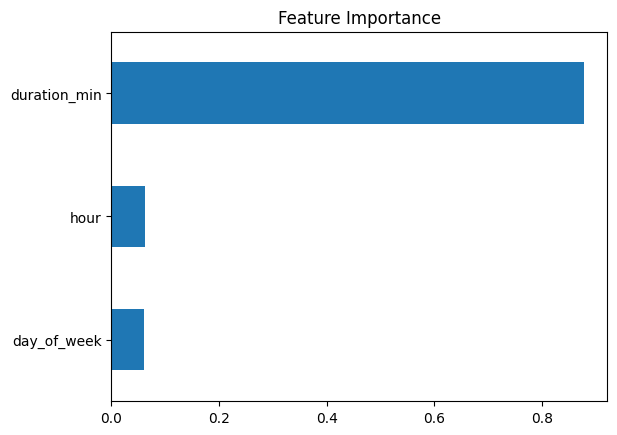

In [1]:
import pandas as pd

# Load a CSV file (e.g., 2019 Q1)
df = pd.read_csv("bike_trip_history.csv")

# Convert date fields to datetime
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])

# Clean column names (if needed)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop rows with missing target
df = df.dropna(subset=['member_type'])


df['duration_min'] = (df['end_date'] - df['start_date']).dt.total_seconds() / 60
df['hour'] = df['start_date'].dt.hour
df['day_of_week'] = df['start_date'].dt.dayofweek  # 0 = Monday

# Optionally drop less informative columns
df = df.drop(columns=['start_station', 'end_station', 'bike_number'])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
df['member_type'] = le.fit_transform(df['member_type'])  # 0 = Customer, 1 = Member

# Select features
features = ['duration_min', 'hour', 'day_of_week']
X = df[features]
y = df['member_type']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model.feature_importances_, index=features)
feat_imp.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()
